# Final Project: Part I
***

## Problem Statement:
Close to 800,000 people die of suicide every year. It is the second leading cause of death among 15-29 year olds. However, suicides occur across all age groups. It is one of the priority conditions in the WHO (World Health Organization) Mental Health Gap Action Programme (mhGAP) launched in 2008. The programme provides evidence-based technical guidance to scale up funds and care in countries for mental, neurological and substance use disorders.

One of the main indicators that dictates the allocation of funds for countries for suicide prevention is the projected number of suicides based on historical trends. To this end, the main goal of this exercise is to predict suicide deaths in the following year by country.

***
## Model Targets and Features:

Target Variable: # of suicides

Feature set: Country, Age group, Sex, Population, GDP/capita, Generation, Suicides/100K population

***
## Goals and Success Metrics:
The goal is to be able to predict with reasonable accuracy the number of suicides by country in the next year at the grain of age, sex, population, GDP/capita and generation. This data will then be used by WHO to budget funds by country for the upcoming year.

For the purposes of this exercise, the success metric is limited to being able to prodive the aforementioned a reasonable prediction on # of suicides by country, and acertain whether there are meaningful changes in trends.

***
## Risks and Limitations:
- Over 79% of suicides occur in low/medium income countries. Unfortunately, consumable data on suicides is only available for 100 countries. Not all low-income countries report this data. Hence, the adjustment of funds allocated by WHO globally cannot be entirely dependent on this exercise.
- While not unique to mental health related data, it must be called out that the accuracy of such self reported data is only as good as their collection techniques. We understand this limitation and proceed.

***
# Getting the datasets ready

#### Source of dataset: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

### Import the dataset

In [230]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [231]:
%matplotlib inline

In [232]:
# Import the data from csv
filepath = 'assets/suicide_master.csv'
suicide = pd.read_csv(filepath)

In [233]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [234]:
# We have 27K rows and 12 columns
suicide.shape

(27820, 12)

### Massage the data

In [235]:
# Check columns
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [236]:
# Clean up column names
suicide = suicide.rename(columns={'suicides/100k pop': 'suicides_per_100k_pop',
                                  'gdp_per_capita ($)': 'gdp_per_capita_usd',
                                  ' gdp_for_year ($) ': 'gdp_for_year_usd', 'HDI for year': 'HDI_for_year',
                                  'country-year': 'country_year'})

In [237]:
# Cleaned up column names
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country                  27820 non-null object
year                     27820 non-null int64
sex                      27820 non-null object
age                      27820 non-null object
suicides_no              27820 non-null int64
population               27820 non-null int64
suicides_per_100k_pop    27820 non-null float64
country_year             27820 non-null object
HDI_for_year             8364 non-null float64
gdp_for_year_usd         27820 non-null object
gdp_per_capita_usd       27820 non-null int64
generation               27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


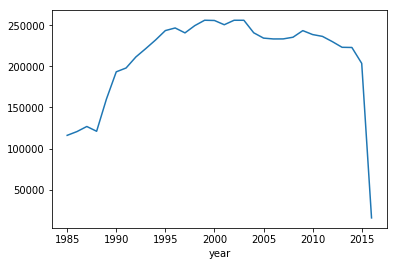

In [238]:
# Check some trends by year
suicide.groupby('year')['suicides_no'].sum().plot();

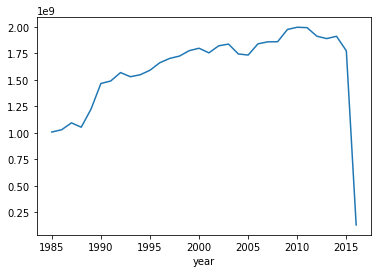

In [239]:
# Check some trends by year
suicide.groupby('year')['population'].sum().plot();

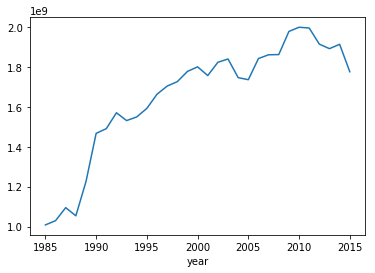

In [240]:
# Last year's data (2016) seems like a partial year
# Create suicide_new where year 2016 is dropped
suicide_new = suicide.loc[suicide['year'] != 2016,:]
suicide_new.groupby('year')['population'].sum().plot();

### Profile the data

In [241]:
suicide_new.describe()
# HDI - Human Development Index, which is a measure of the quality of life seems to be sparsly populated - This needs to
# be inspected further

,year,suicides_no,population,suicides_per_100k_pop,HDI_for_year,gdp_per_capita_usd
count,27660.000000,27660.000000,2.766000e+04,27660.000000,8364.000000,27660.000000
mean,2001.173102,243.413485,1.850689e+06,12.812597,0.776601,16815.568330
std,8.418754,904.490185,3.920658e+06,18.972063,0.093367,18861.585497
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1994.000000,3.000000,9.753525e+04,0.910000,0.713000,3436.000000
50%,2002.000000,25.000000,4.307250e+05,5.980000,0.779000,9283.000000
75%,2008.000000,132.000000,1.491041e+06,16.602500,0.855000,24796.000000
max,2015.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


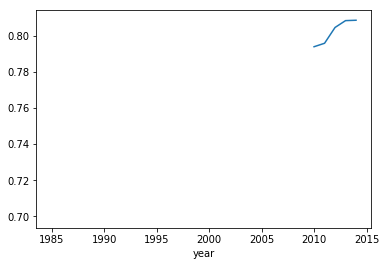

In [242]:
suicide_new.groupby('year')['HDI_for_year'].mean().plot();
# HDI seems to be recorded only since 2010. Hence, this shouldn't be considered in our model

### Evaluate feature correlation with the target (suicides_no)

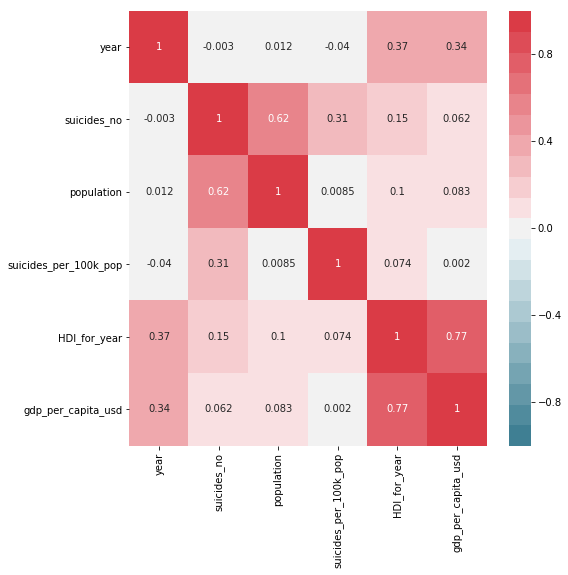

In [243]:
# Visualize correlation matrix in Seaborn using a heat map.
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(suicide_new.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
            ax=ax,
           );

# Based on the correlation matrix below, population, suicides_per_100k_pop, gdp_per_capita_usd seem to be good candidates
# as features

In [244]:
# Adding dummy variables for country, sex and age
suicide_new2 = pd.get_dummies(suicide_new, columns=['country','sex','age'])

In [245]:
# Check Column List
for col in suicide_new2.columns:
    print(col)

year
suicides_no
population
suicides_per_100k_pop
country_year
HDI_for_year
gdp_for_year_usd
gdp_per_capita_usd
generation
country_Albania
country_Antigua and Barbuda
country_Argentina
country_Armenia
country_Aruba
country_Australia
country_Austria
country_Azerbaijan
country_Bahamas
country_Bahrain
country_Barbados
country_Belarus
country_Belgium
country_Belize
country_Bosnia and Herzegovina
country_Brazil
country_Bulgaria
country_Cabo Verde
country_Canada
country_Chile
country_Colombia
country_Costa Rica
country_Croatia
country_Cuba
country_Cyprus
country_Czech Republic
country_Denmark
country_Dominica
country_Ecuador
country_El Salvador
country_Estonia
country_Fiji
country_Finland
country_France
country_Georgia
country_Germany
country_Greece
country_Grenada
country_Guatemala
country_Guyana
country_Hungary
country_Iceland
country_Ireland
country_Israel
country_Italy
country_Jamaica
country_Japan
country_Kazakhstan
country_Kiribati
country_Kuwait
country_Kyrgyzstan
country_Latvia
count

In [213]:
# Create a dataframe with correlation matrix since the number of columns is large
suicide_new2_corrs = suicide_new2.corr()

In [214]:
suicide_new2_corrs['suicides_no'].describe()

count    112.000000
mean       0.019239
std        0.131875
min       -0.114749
25%       -0.025825
50%       -0.017615
75%       -0.002320
max        1.000000
Name: suicides_no, dtype: float64

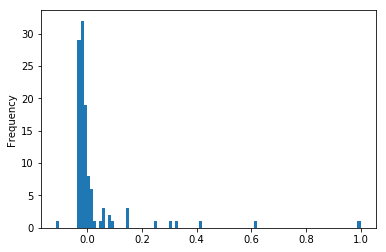

In [226]:
# Chart the distribution of the correlations
ax = suicide_new2_corrs.loc[:, 'suicides_no'].plot(kind='hist', bins=100)

In [227]:
suicide_new2_corrs.to_csv('assets/feature_correlations.csv', sep='\t', encoding='utf-8')

# Performed in Excel to test for different threshholds: Filtering for only those features that have correlation 
# between 0.2 and -0.2 yields the follwing additional feature set:
# population
# suicides_per_100k_pop
# country_Japan
# country_Russian Federation
# country_United States

# Final feature set:
# population
# suicides_per_100k_pop
# country_Japan
# country_Russian Federation
# country_United States
# suicides_per_100k_pop
# gdp_per_capita_usd

In [263]:
# Clean up the feature and target list

feature_cols = ['population','suicides_per_100k_pop','country_Japan','country_Russian Federation',
                                 'country_United States','suicides_per_100k_pop','gdp_per_capita_usd']
target_col = ['suicides_no']

In [264]:
# Create feature and target dataframes

X = suicide_new2.loc[:, feature_cols]
y = suicide_new2.loc[:, target_col]

In [268]:
print(X.head())
print(y.head())

   population  suicides_per_100k_pop  country_Japan  \
0      312900                   6.71              0   
1      308000                   5.19              0   
2      289700                   4.83              0   
3       21800                   4.59              0   
4      274300                   3.28              0   

   country_Russian Federation  country_United States  suicides_per_100k_pop  \
0                           0                      0                   6.71   
1                           0                      0                   5.19   
2                           0                      0                   4.83   
3                           0                      0                   4.59   
4                           0                      0                   3.28   

   gdp_per_capita_usd  
0                 796  
1                 796  
2                 796  
3                 796  
4                 796  
   suicides_no
0           21
1           16
2    